In [120]:
from skimage import io,filters,color
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sys

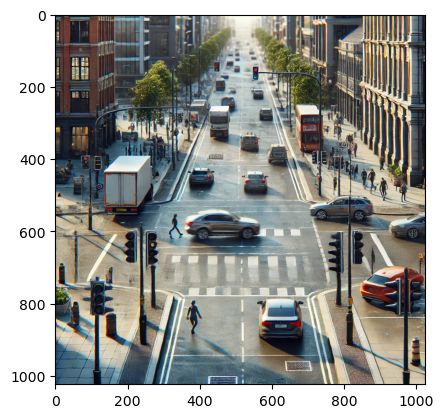

In [121]:
if len(sys.argv) != 2:
    print("Usage: python task2.py <image_path>")
    sys.exit(1)

# Get the image path from the command-line argument
path = sys.argv[1]
image = io.imread(path)

In [122]:
x = int(input("Enter the top-left x coordinate: "))
y = int(input("Enter the top-left y coordinate: ")) 
width = int(input("Enter the width of the rectangle: "))
height = int(input("Enter the height of the rectangle: ")) 

enhancement = input("Which enhancement would you like to apply? (Blurring or Sharpening or None): ") 

transparency_level = float(input("Enter the transparency level: ")) 

# x = 100
# y = 100
# width = 500
# height = 500
# 
# enhancement = "blurring"
# 
# transparency_level = 0.5

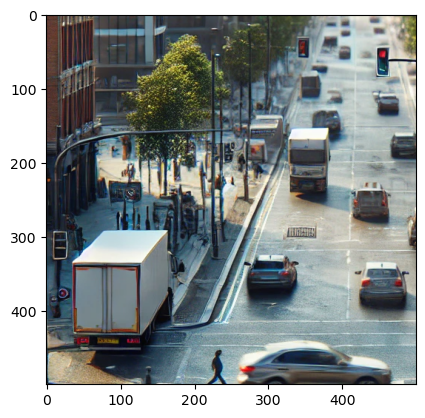

In [123]:
extracted = image[y:y+height, x:x+width]

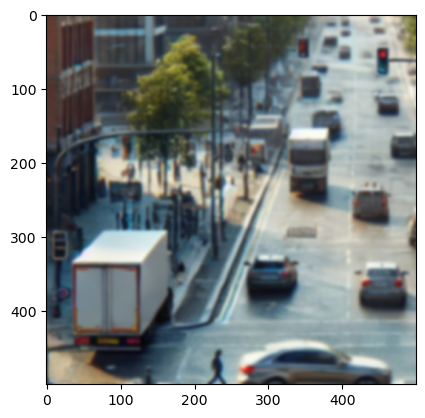

In [124]:
def apply_enhancement(region, enhancement):
    if enhancement.lower() == "blurring":
        enhanced_region = filters.gaussian(region,sigma =2,channel_axis = 2)
    elif enhancement.lower() == "sharpening":
        # enhanced_region = filters.unsharp_mask(region)
        sharpening_kernel = np.array(
                            [[0, -1, 0],
                            [-1, 5, -1],
                            [0, -1, 0]]
        )
        enhanced_region = cv2.filter2D(region, -1, sharpening_kernel)
    else:
        enhanced_region = region
    return enhanced_region

enhanced_region = apply_enhancement(extracted, enhancement)

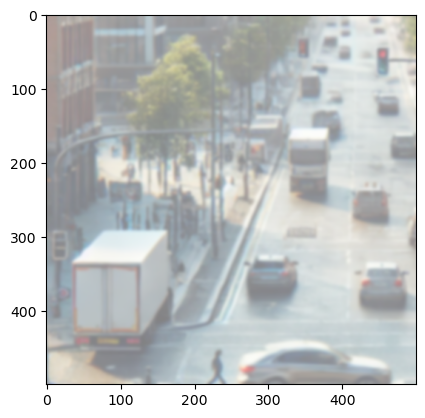

In [132]:
def transparency(enhanced_region, transparency_level):
    r = enhanced_region[:,:,0]
    g = enhanced_region[:,:,1]
    b = enhanced_region[:,:,2]
    a = np.ones(r.shape) * transparency_level
    final_region = np.dstack((r,g,b,a))
    final_region = color.rgba2rgb(final_region)
    final_region = (final_region * 255).astype(np.uint8)
    return final_region

final_region = transparency(enhanced_region, transparency_level)

In [133]:
output = image.copy()
output[y:y+height, x:x+width] = final_region

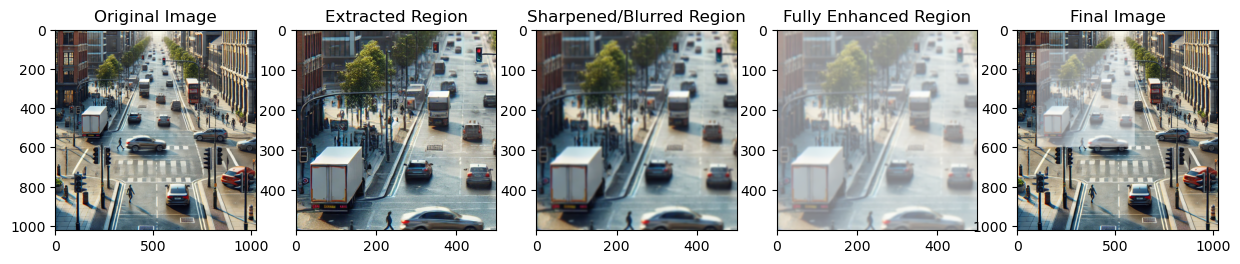

In [134]:
def save_image(image, path):
    io.imsave(path, image)
save_image(output, "FinalLabSubmission/task2_output.png")

In [ ]:
def report():
    print("X-coordinate of the top-left corner of the rectangle: ", x)
    print("Y-coordinate of the top-left corner of the rectangle: ", y)
    print("Width of the rectangle: ", width)
    print("Height of the rectangle: ", height)
    print("Enhancement applied: ", enhancement)
    print("Transparency level: ", transparency_level)
    print("Saved the output image as task2_output.png")
    #Steps
    print("Step 1: Extracted the region of interest from the image using the provided coordinates")
    print("Step 2: Applied the enhancement to the extracted region whether it is blurring, sharpening or neither")
    print("Step 3: Added transparency to the enhanced region by converting to rgba then back to rgb")
    print("Step 4: Replaced the original region with the enhanced region")
    print("Step 5: Saved the output image")
    
report()